# Lab 03 - Artificial Neural Networks Intro
In this lab we will look into building ANNs, starting with the perceptron and eventually building Multi Layer Perceptrons. We will also experiment with the different parameters for ANNs.
### Perceptron
First lets build the main mechanism (summation function) of the perceptron.

In [1]:
import numpy as np
example_input = [1, .2, .1, .05, .2]
example_weights = [.2, .12, .4, .6, .90]
input_vector = np.array(example_input)
weights = np.array(example_weights)
bias_weight = .2


#   = (1 * 0.2) + (0.2 * 0.12) + (0.1 * 0.4) + (0.05 * 0.6) + (0.2 * 0.9) + (0.2 * 1)
#   = 0.2 + 0.024 + 0.04 + 0.03 + 0.18 + 0.2
#                
                
# output = activation_level 

def calc_output(input_vector, weights, bias_weight):
    activation_level = np.dot(input_vector, weights) + (bias_weight * 1)
    return activation_level

Try it!

In [2]:
activation_level = calc_output(input_vector, weights, bias_weight)
print(activation_level)

0.674


## Challenge 01

Now lets calculate the activation as a step function

In [3]:
threshold = 0.5

def calc_activation(threshold, activation_level):
    ## TODO: Implement this function to calculate the activation. Use a simple if statement to set the activation to 1 or 0.
    return perceptron_output

Try it!

In [4]:
perceptron_output = calc_activation(threshold, activation_level)
print(perceptron_output)

1


Now lets try out different inputs and see the output.

In [5]:
print(calc_activation(0.5, calc_output([1, .2, .1, .05, .2], [.1, .02, .2, .3, .01], .2)))

0


In [6]:
print(calc_activation(0.5, calc_output([.5, .1, .1, .05, .1], [.2, .12, .4, .6, .90], .2)))

0


Lets do some learning... and observe how the weights change.

In [7]:
expected_output = 0
new_weights = []

for i, x in enumerate(example_input):
    new_weights.append(weights[i] + (expected_output - perceptron_output) * x)

weights = np.array(new_weights)

So lets compare the original and new weights

In [8]:
print(example_weights)
print(weights)

[0.2, 0.12, 0.4, 0.6, 0.9]
[-0.8  -0.08  0.3   0.55  0.7 ]


### Teaching the Perceptron to solve the Truth Table
Let's try to teach it the OR boolean logic function

In [4]:
sample_data = [
... [0, 0], # False, False
... [0, 1], # False, True
... [1, 0], # True, False
... [1, 1]] # True, True
expected_results = [
... 0, # (False OR False) gives False
... 1, # (False OR True ) gives True
... 1, # (True OR False) gives True
... 1] # (True OR True ) gives True

In [10]:
from random import random
weights = np.random.random(2)/1000 # Small random float 0 < w < .001
bias_weight = np.random.random() / 1000
print(weights)
print(bias_weight)

[0.00037423 0.00021298]
0.00023979000545517625


## Challenge 02

In [11]:
for idx, sample in enumerate(sample_data):
    input_vector = np.array(sample)
    #TODO: Use the functions defined above to calculate the activation level and the output of the perceptron. Use the weights and bias weight to calculate the activation level.
    activation_level = ...
    perceptron_output = ...
    print('Expected {} - Predicted {}'.format(expected_results[idx], perceptron_output))

Expected 0 - Predicted 0
Expected 1 - Predicted 0
Expected 1 - Predicted 0
Expected 1 - Predicted 0


Not very successful when using random weights... Now let's teach it!

In [12]:
for iteration_num in range(5):
    correct_answers = 0
    for idx, sample in enumerate(sample_data):
        input_vector = np.array(sample)
        weights = np.array(weights)
        activation_level = calc_output(input_vector, weights, bias_weight)
        perceptron_output = calc_activation(threshold, activation_level)
        #TODO: Write an if statement to compare perceptron_output with expected_results and increment correct_answers
        new_weights = []
        for i, x in enumerate(sample):
            new_weights.append(weights[i] + (expected_results[idx] - perceptron_output) * x)
        bias_weight = bias_weight + ((expected_results[idx] - perceptron_output) * 1)
        weights = np.array(new_weights)
    print('{} correct answers out of 4, for iteration {}'.format(correct_answers, iteration_num))

3 correct answers out of 4, for iteration 0
2 correct answers out of 4, for iteration 1
3 correct answers out of 4, for iteration 2
4 correct answers out of 4, for iteration 3
4 correct answers out of 4, for iteration 4


## Challenge 03
Try experimenting with other operators such as AND and XOR. Adjust the learning cycles (iterations) and see if the Perceptron can learn XOR.

## Perceptron implementation in SKLEARN
Let's try one already implemented in scikit-learn, but with some NLP data.

First we are going to grab the data and generate the TFIDF vectors

In [13]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import fetch_20newsgroups

# Get some data
categories = ['alt.atheism', 'sci.med']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True)

# Initiate the perceptron object
perceptron = Perceptron(max_iter=100)

from sklearn.feature_extraction.text import CountVectorizer

#TODO: Calculate the frequency vectors using Count Vectorizer from sklearn, and use fit_transform over train.data to get X_train_counts

from sklearn.feature_extraction.text import TfidfTransformer

# Calculate the TFIDF vectors
tfidf_tf = TfidfTransformer()
X_train_tfidf = tfidf_tf.fit_transform(X_train_counts)

Now we are going to perform the training, given the input and the target (desired outputs)

In [14]:
%%time
# Train
perceptron.fit(X_train_tfidf, train.target)

CPU times: user 23.4 ms, sys: 4.97 ms, total: 28.4 ms
Wall time: 4.94 ms


Perceptron(max_iter=100)

So now we are good to perform some testing

In [15]:
# Prepare some test data
test_docs = ['Religion is widespread, even in modern times',
'His kidney failed to function','Some people do not believe in god',
'White blood cells fight off infections',
'The reverend had a heart attack in the church']

X_test_counts = cv.transform(test_docs)
X_test_tfidf = tfidf_tf.transform(X_test_counts)
print(X_test_tfidf.shape)

# Perform the prediction
pred = perceptron.predict(X_test_tfidf)
for doc, category in zip(test_docs, pred):
    print('%r => %s' % (doc, train.target_names[category]))

(5, 22735)
'Religion is widespread, even in modern times' => alt.atheism
'His kidney failed to function' => sci.med
'Some people do not believe in god' => alt.atheism
'White blood cells fight off infections' => sci.med
'The reverend had a heart attack in the church' => sci.med


This is pretty impressive, but the two subjects choosen are pretty different and therefore linearly separable.

Lets pickup a latger test set ans measure the F1 score.

In [16]:
from sklearn import metrics
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True)
X_test_counts = cv.transform(test.data)
X_test_tfidf = tfidf_tf.transform(X_test_counts)
print(X_test_tfidf.shape)

pred = perceptron.predict(X_test_tfidf)
metrics.f1_score(test.target, pred, average='macro')

(715, 22735)


0.9430505774591795

## Challenge 04
Try other categories (explore the [documentation](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset) to see what options there are) and see if the perceptron still learns. Try a different number of iterations to see if performance improves. Also explore other metric (like precision, recall, etc.) in the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) and see if you can understand the results better.

### Multi Layer Perceptron (MLP)

Now lets look at a Multi Layer Perceptron (MLP) and experiment with different parameters


learning on dataset news
training: constant learning-rate
Training set score: 0.860000
Training set loss: 0.267127
training: constant with momentum
Training set score: 0.826000
Training set loss: 0.259419
training: constant with Nesterov's momentum
Training set score: 0.848000
Training set loss: 0.276078
training: inv-scaling learning-rate
Training set score: 0.496000
Training set loss: 0.693931
training: inv-scaling with momentum
Training set score: 0.534000
Training set loss: 0.684897
training: inv-scaling with Nesterov's momentum
Training set score: 0.534000
Training set loss: 0.684780
training: adam
Training set score: 0.888000
Training set loss: 0.202242


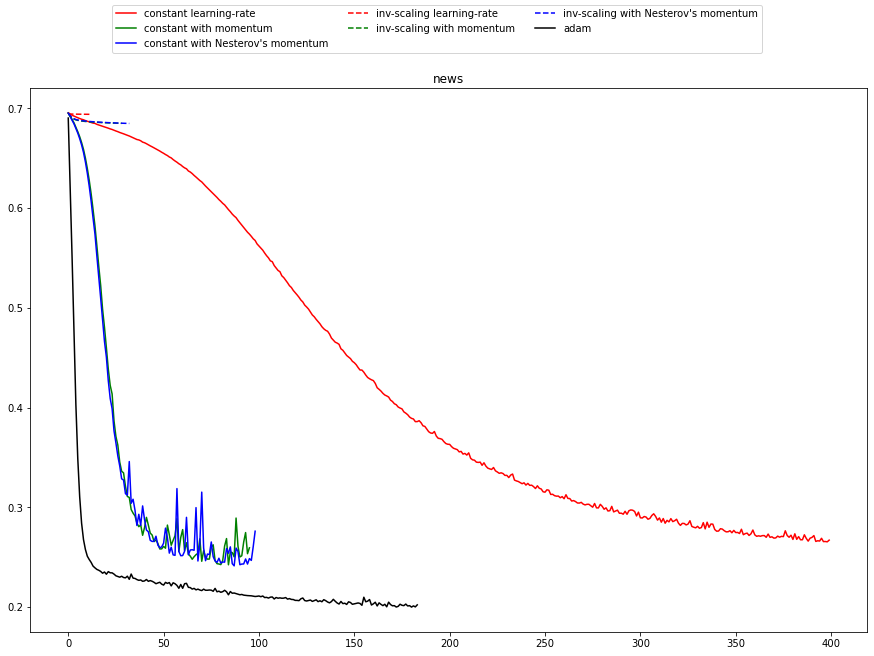

In [17]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9, 'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9, 'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", 
          "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", 
          "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", 
          "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

# Prepare the plot... using a subplot here in case you want to plot muiltiple
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

# Choosing the first 500 records and only 1000 features... just for this lab, else it will be very slow
data_sets = [(X_train_tfidf.toarray()[:500,:1000], train.target[:500])]

# call the function to train and prepare results in plots
plot_on_dataset(*data_sets[0], axes, name='news')

fig.legend(axes.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

## Challenge 05
Look at the classifier [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and experiment with the following parameters: hidden_layer_sizes, activation, batch_size

Add the above variations in the parameters list and see if there are any changes

## Challenge 06
### Sentiment analysis of movie reviews

The following sub-section will show you how to perform sentiment analysis on the [movie review dataset](https://www.cs.cornell.edu/people/pabo/movie-review-data/) using simple perceptrons:

1) Run the script bellow to download the necessary data

In [ ]:
### The below script is taken from https://github.com/scikit-learn/scikit-learn/blob/main/doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py

"""Script to download the movie review dataset"""

from pathlib import Path
from hashlib import sha256
import tarfile
from urllib.request import urlopen


URL = "http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"

ARCHIVE_SHA256 = "fc0dccc2671af5db3c5d8f81f77a1ebfec953ecdd422334062df61ede36b2179"
ARCHIVE_NAME = Path(URL.rsplit("/", 1)[1])
DATA_FOLDER = Path("txt_sentoken")


if not DATA_FOLDER.exists():

    if not ARCHIVE_NAME.exists():
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, "wb") as archive:
            archive.write(opener.read())

    try:
        print("Checking the integrity of the archive")
        assert sha256(ARCHIVE_NAME.read_bytes()).hexdigest() == ARCHIVE_SHA256

        print("Decompressing %s" % ARCHIVE_NAME)
        with tarfile.open(ARCHIVE_NAME, "r:gz") as archive:
            archive.extractall(path=".")

    finally:
        ARCHIVE_NAME.unlink()

2) load the dataset

In [ ]:
from sklearn.datasets import load_files

# Load the dataset we just downloaded using the load_files function from sklearn
movie_reviews_data_folder = "txt_sentoken"
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples in the dataset: %d" % len(dataset.data))

3. pre-process the data

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TODO: Initialize the perceptron object
# TODO: Calculate the frequency vectors using Count Vectorizer as 'cv' from sklearn, 
# and use fit_transform over docs_train

# TODO: fit the perceptron using the frequency vectors and the target values

4) Test the trained model

In [ ]:
from sklearn import metrics

#X_test_counts is a sparse matrix that is obtained by transforming the test documents using the cv CountVectorizer object. 
# It transforms the test data using the vocabulary that was learned from the training data.
X_test_counts = cv.transform(docs_test)

#tfidf_tf - transforms the test data by applying the inverse document frequency scaling to the term frequency 
X_test_tfidf = tfidf_tf.transform(X_test_counts)

# Perform the prediction
pred = perceptron.predict(X_test_tfidf)

# Print the classification report
print(metrics.classification_report(y_test, pred,
                                target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print(f"confusion matrix -> {cm}")

import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()

The following cell selects 5 reviews in the test set and shows both their predicted and actual sentiment.

In [ ]:
for doc, prediction, actual in zip(docs_test[:5], pred[:5], y_test[:5]):
    #The %r => %s formatting string is used to print the document (represented by %r) 
    #and its predicted category label (represented by %s) for each document in the test_docs list.
    print(f"{doc} => predicted: {prediction} / actual: {actual}")